In [1]:
import torch
import pickle
import numpy as np
import matplotlib.pyplot as plt

results_44 = pickle.load(open('results/model_8_8_20/epoch_44_total_results.pkl','rb'))
results_61 = pickle.load(open('results/model_8_8_20/epoch_61_total_results.pkl','rb'))
results_99 = pickle.load(open('results/model_8_8_20/epoch_99_total_results.pkl','rb'))
results_prob = pickle.load(open('results/prob_model_8_11_20/prob_results_epoch_42_test.pkl','rb'))

In [2]:
train_preds_44 = results_44['train_predictions']
test_preds_44 = results_44['test_predictions']
train_times_44 = results_44['train_times']
test_times_44 = results_44['test_times']

train_preds_61 = results_61['train_predictions']
test_preds_61 = results_61['test_predictions']
train_times_61 = results_61['train_times']
test_times_61 = results_61['test_times']

train_preds_99 = results_99['train_predictions']
test_preds_99 = results_99['test_predictions']
train_times_99 = results_99['train_times']
test_times_99 = results_99['test_times']

train_preds_prob = results_prob['train_predictions']
print(type(train_preds_prob), train_preds_prob.shape)
for i in range(len(train_preds_prob)):
    train_preds_prob[i] = torch.sigmoid(train_preds_prob[i])
test_preds_prob = results_prob['test_predictions']
for i in range(len(test_preds_prob)):
    test_preds_prob[i] = torch.sigmoid(test_preds_prob[i])
train_times_prob = results_prob['train_times']
test_times_prob = results_prob['test_times']

vid_names = results_99['test_fullpaths']

<class 'numpy.ndarray'> (800,)


In [3]:
def plot_one(pred_array, title='', crashtime=None):
    times = np.arange(len(pred_array))*0.1+0.9
    plt.ylim(-0.2,1.2)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.plot(times, pred_array)
    plt.plot(times, np.zeros(len(pred_array)))
    plt.plot(times, 0.5*np.ones(len(pred_array)))
    plt.plot(times, np.ones(len(pred_array)))
    if crashtime is not None and crashtime > 0:
        plt.vlines(crashtime, -1, 2)
    plt.show()

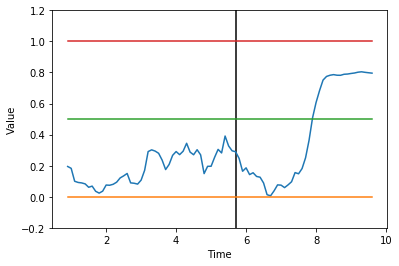

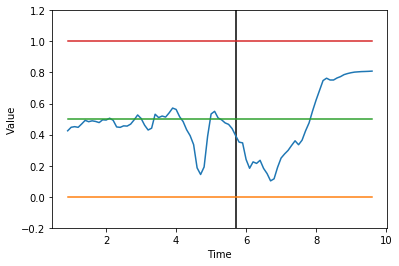

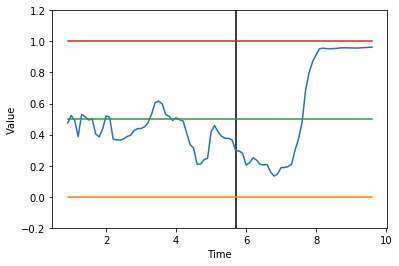

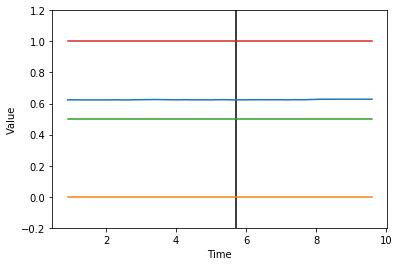

In [4]:
ind = 82
plot_one(test_preds_44[ind].cpu().numpy(), crashtime=test_times_44[ind])
plot_one(test_preds_61[ind].cpu().numpy(), crashtime=test_times_61[ind])
plot_one(test_preds_99[ind].cpu().numpy(), crashtime=test_times_99[ind])
plot_one(test_preds_prob[ind].cpu().numpy(), crashtime=test_times_prob[ind])

In [4]:
def plot_several(array, times, name, number, inc=5, vid_locs = results_99['test_fullpaths']):
    title_prefix = name+'_epoch_'+str(number)+'_vid_'
    for i in range(0,len(array),inc):
        print(vid_locs[i])
        plot_one(array[i].cpu().numpy(), title=title_prefix+str(i), crashtime=times[i])

/mnt/linuxshared/data/BeamNG/positive/pos_2.mp4


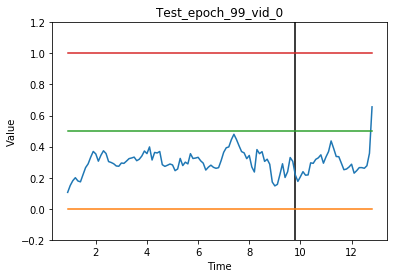

/mnt/linuxshared/data/BeamNG/positive/pos_3.mp4


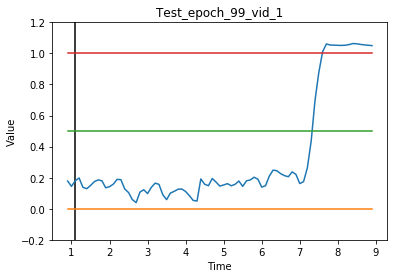

/mnt/linuxshared/data/BeamNG/positive/pos_4.mp4


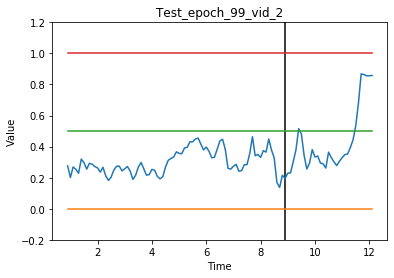

/mnt/linuxshared/data/BeamNG/positive/pos_5.mp4


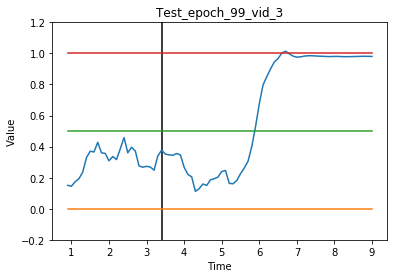

/mnt/linuxshared/data/BeamNG/positive/pos_11.mp4


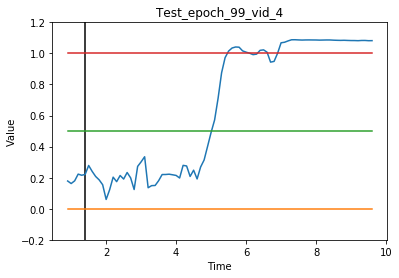

/mnt/linuxshared/data/BeamNG/positive/pos_13.mp4


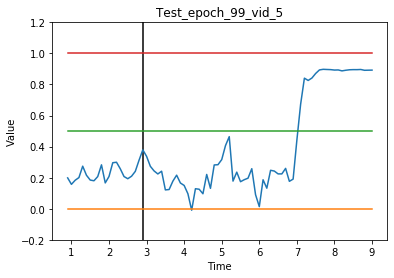

/mnt/linuxshared/data/BeamNG/positive/pos_23.mp4


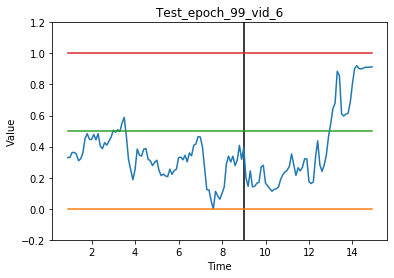

/mnt/linuxshared/data/BeamNG/positive/pos_48.mp4


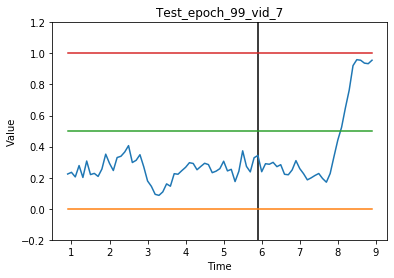

/mnt/linuxshared/data/BeamNG/positive/pos_52.mp4


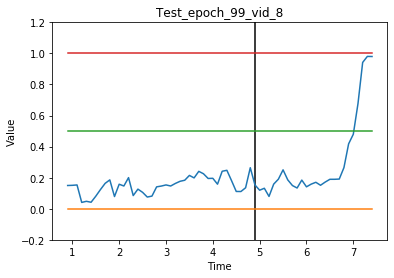

/mnt/linuxshared/data/BeamNG/positive/pos_56.mp4


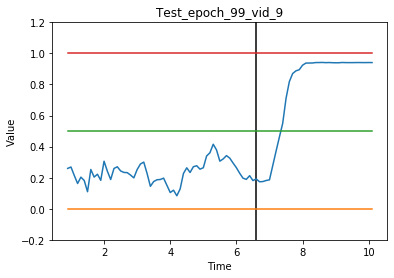

/mnt/linuxshared/data/BeamNG/positive/pos_62.mp4


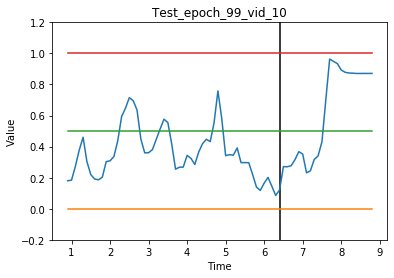

/mnt/linuxshared/data/BeamNG/positive/pos_67.mp4


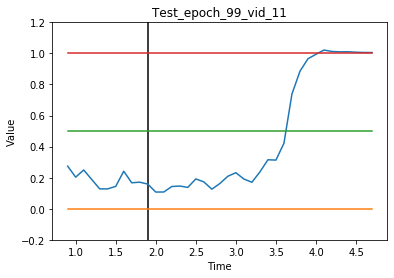

/mnt/linuxshared/data/BeamNG/positive/pos_70.mp4


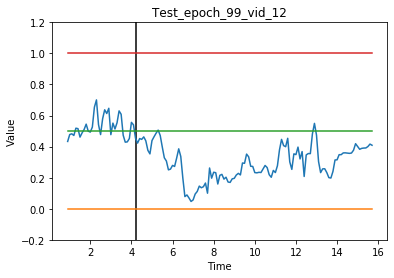

/mnt/linuxshared/data/BeamNG/positive/pos_75.mp4


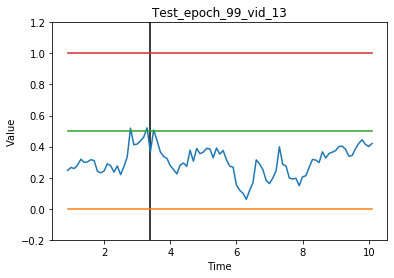

/mnt/linuxshared/data/BeamNG/positive/pos_90.mp4


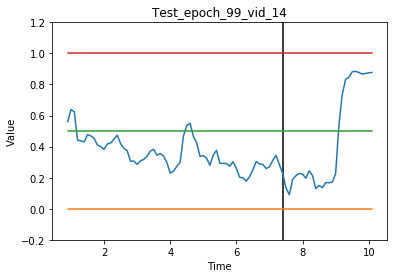

/mnt/linuxshared/data/BeamNG/positive/pos_100.mp4


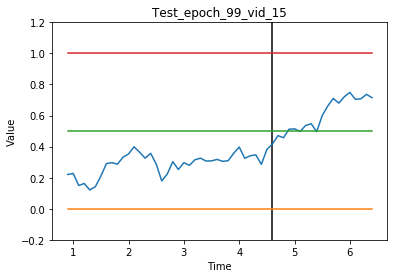

/mnt/linuxshared/data/BeamNG/positive/pos_105.mp4


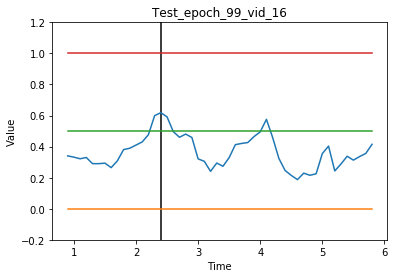

/mnt/linuxshared/data/BeamNG/positive/pos_119.mp4


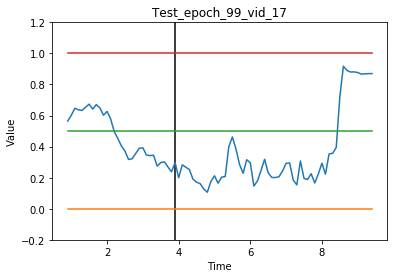

/mnt/linuxshared/data/BeamNG/positive/pos_120.mp4


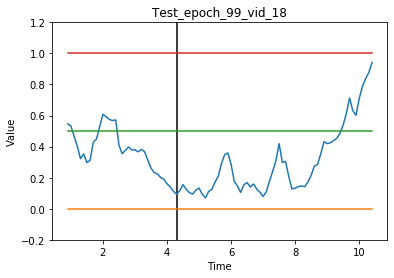

/mnt/linuxshared/data/BeamNG/positive/pos_125.mp4


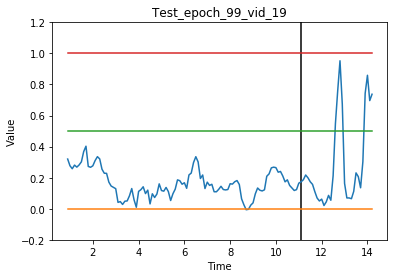

/mnt/linuxshared/data/BeamNG/positive/pos_133.mp4


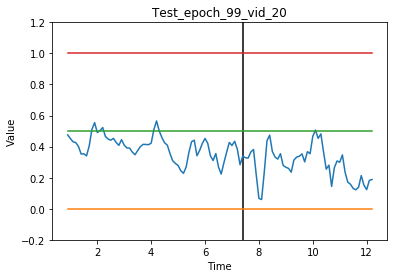

/mnt/linuxshared/data/BeamNG/positive/pos_136.mp4


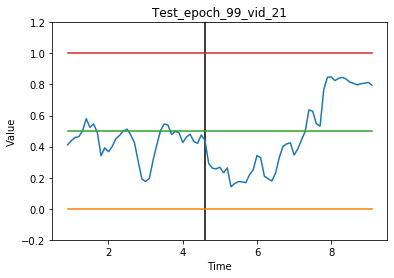

/mnt/linuxshared/data/BeamNG/positive/pos_141.mp4


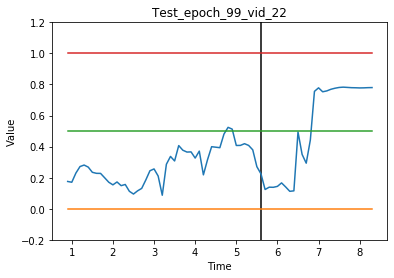

/mnt/linuxshared/data/BeamNG/positive/pos_143.mp4


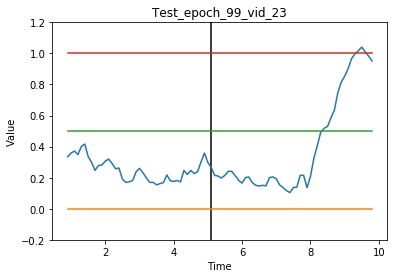

/mnt/linuxshared/data/BeamNG/positive/pos_144.mp4


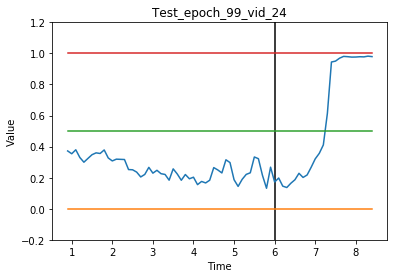

/mnt/linuxshared/data/BeamNG/positive/pos_146.mp4


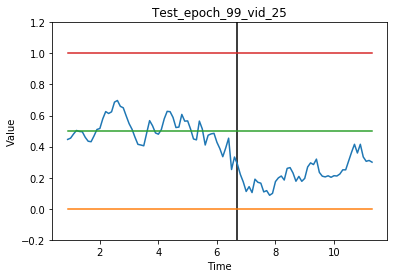

/mnt/linuxshared/data/BeamNG/positive/pos_161.mp4


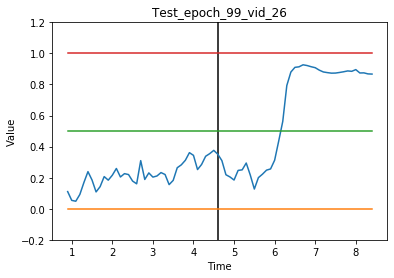

/mnt/linuxshared/data/BeamNG/positive/pos_162.mp4


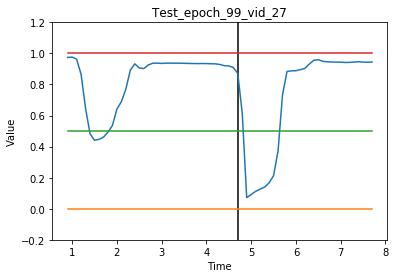

/mnt/linuxshared/data/BeamNG/positive/pos_170.mp4


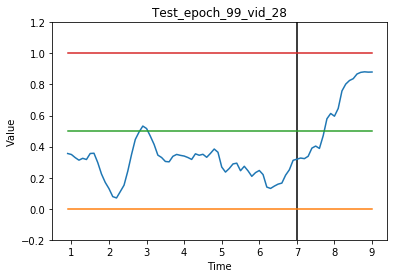

/mnt/linuxshared/data/BeamNG/positive/pos_175.mp4


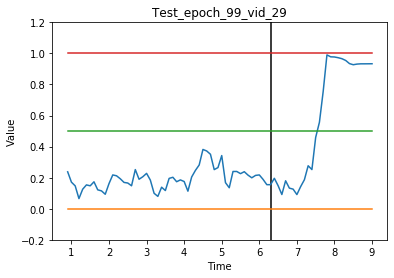

/mnt/linuxshared/data/BeamNG/positive/pos_177.mp4


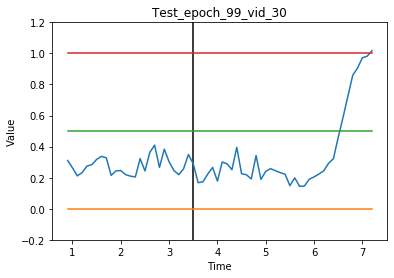

/mnt/linuxshared/data/BeamNG/positive/pos_181.mp4


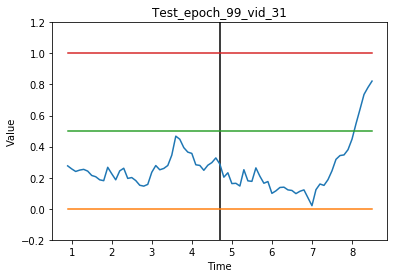

/mnt/linuxshared/data/BeamNG/positive/pos_192.mp4


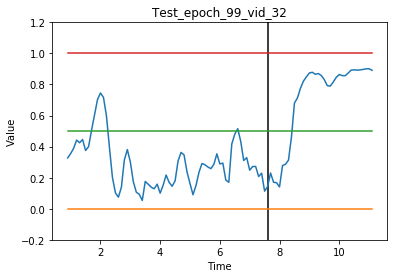

/mnt/linuxshared/data/BeamNG/positive/pos_205.mp4


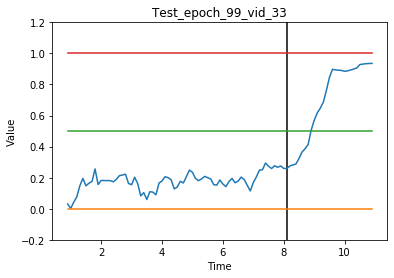

/mnt/linuxshared/data/BeamNG/positive/pos_207.mp4


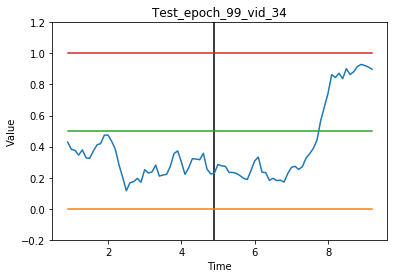

/mnt/linuxshared/data/BeamNG/positive/pos_211.mp4


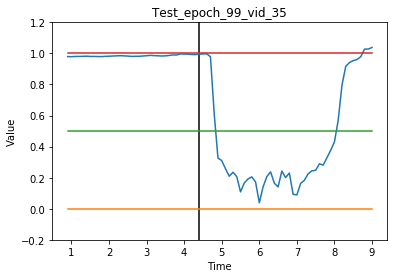

/mnt/linuxshared/data/BeamNG/positive/pos_212.mp4


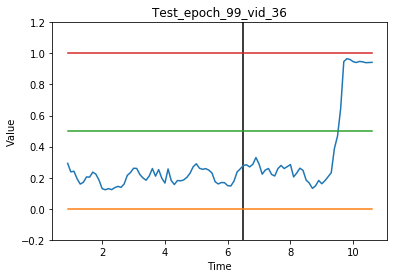

/mnt/linuxshared/data/BeamNG/positive/pos_215.mp4


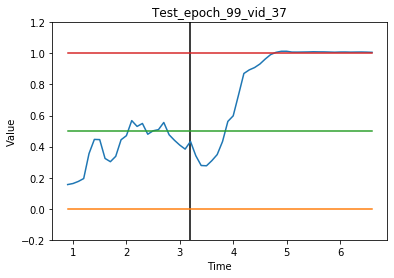

/mnt/linuxshared/data/BeamNG/positive/pos_217.mp4


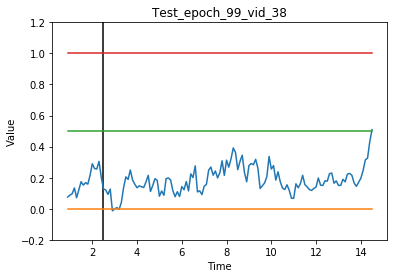

/mnt/linuxshared/data/BeamNG/positive/pos_218.mp4


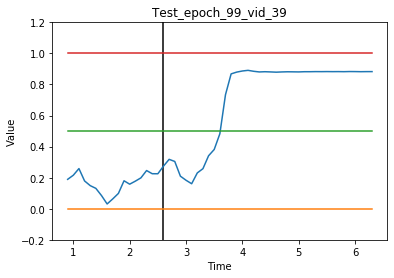

/mnt/linuxshared/data/BeamNG/positive/pos_222.mp4


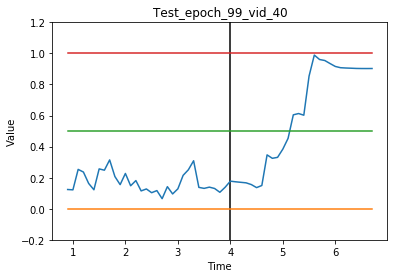

/mnt/linuxshared/data/BeamNG/positive/pos_223.mp4


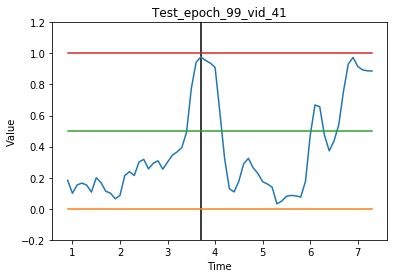

/mnt/linuxshared/data/BeamNG/positive/pos_224.mp4


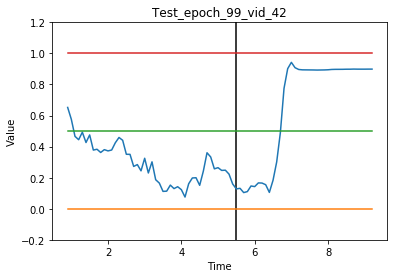

/mnt/linuxshared/data/BeamNG/positive/pos_227.mp4


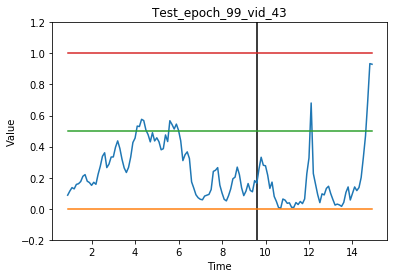

/mnt/linuxshared/data/BeamNG/positive/pos_231.mp4


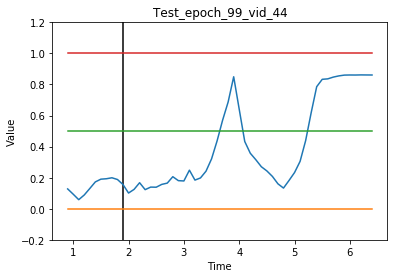

/mnt/linuxshared/data/BeamNG/positive/pos_235.mp4


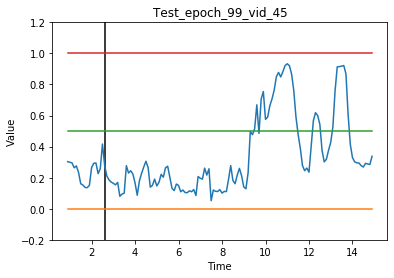

/mnt/linuxshared/data/BeamNG/positive/pos_242.mp4


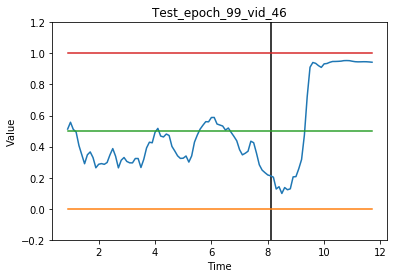

/mnt/linuxshared/data/BeamNG/positive/pos_243.mp4


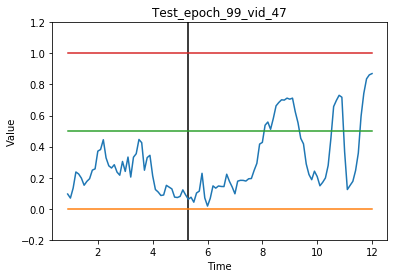

/mnt/linuxshared/data/BeamNG/positive/pos_247.mp4


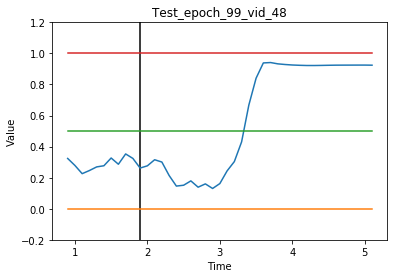

/mnt/linuxshared/data/BeamNG/positive/pos_254.mp4


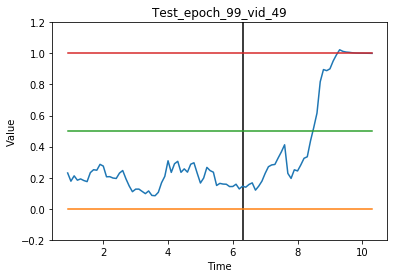

/mnt/linuxshared/data/BeamNG/positive/pos_255.mp4


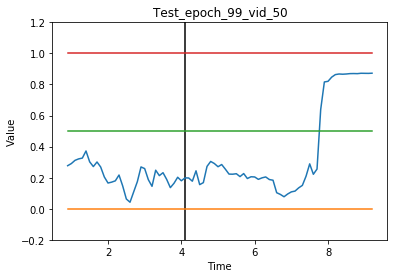

/mnt/linuxshared/data/BeamNG/positive/pos_257.mp4


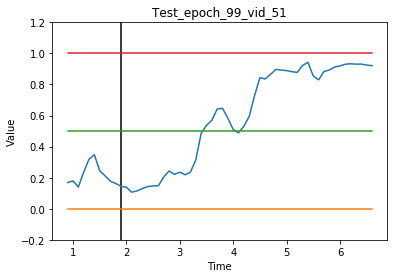

/mnt/linuxshared/data/BeamNG/positive/pos_261.mp4


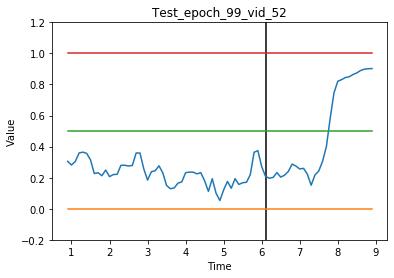

/mnt/linuxshared/data/BeamNG/positive/pos_263.mp4


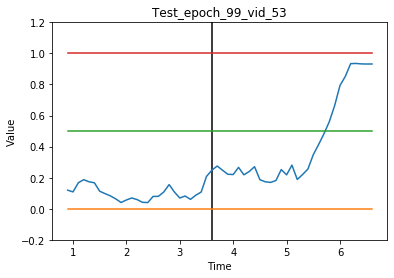

/mnt/linuxshared/data/BeamNG/positive/pos_269.mp4


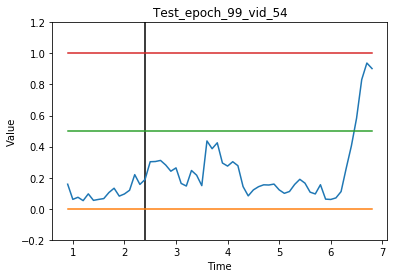

/mnt/linuxshared/data/BeamNG/positive/pos_277.mp4


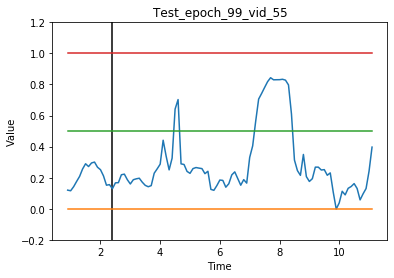

/mnt/linuxshared/data/BeamNG/positive/pos_283.mp4


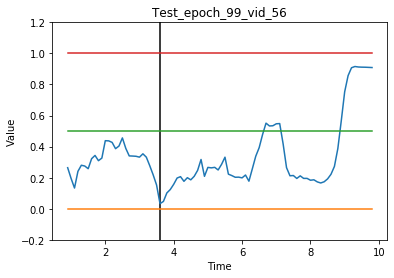

/mnt/linuxshared/data/BeamNG/positive/pos_284.mp4


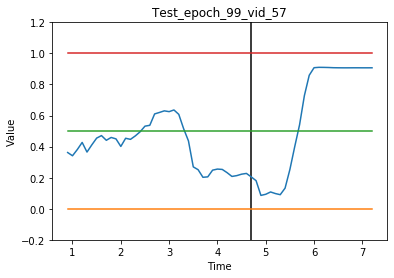

/mnt/linuxshared/data/BeamNG/positive/pos_286.mp4


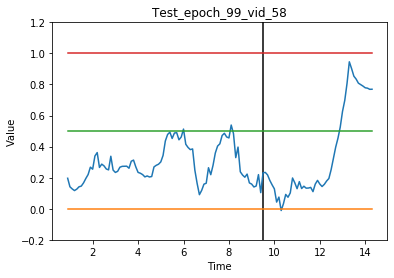

/mnt/linuxshared/data/BeamNG/positive/pos_293.mp4


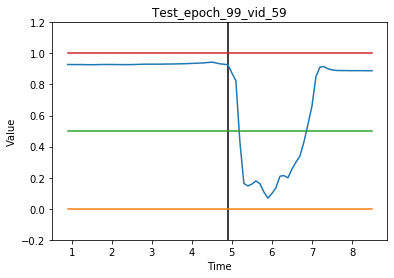

/mnt/linuxshared/data/BeamNG/positive/pos_296.mp4


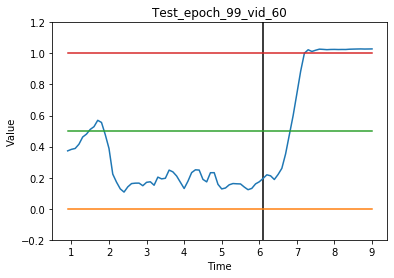

/mnt/linuxshared/data/BeamNG/positive/pos_303.mp4


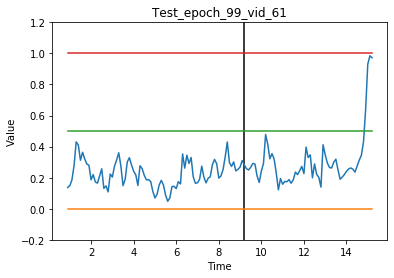

/mnt/linuxshared/data/BeamNG/positive/pos_304.mp4


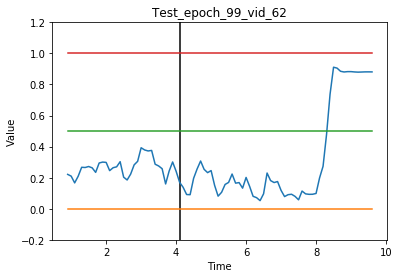

/mnt/linuxshared/data/BeamNG/positive/pos_308.mp4


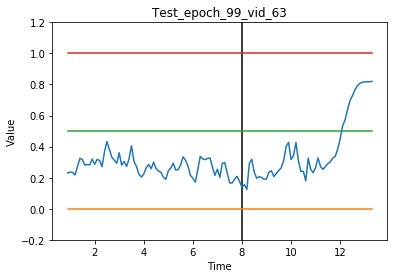

/mnt/linuxshared/data/BeamNG/positive/pos_312.mp4


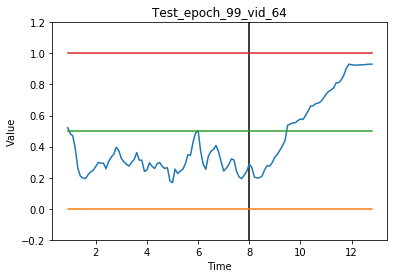

/mnt/linuxshared/data/BeamNG/positive/pos_318.mp4


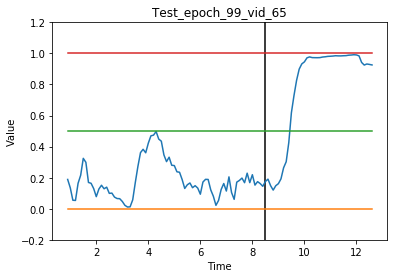

/mnt/linuxshared/data/BeamNG/positive/pos_320.mp4


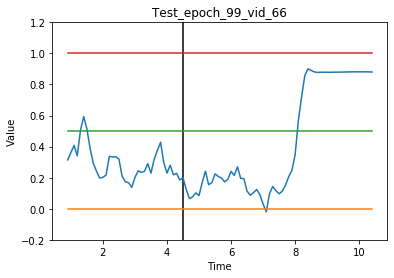

/mnt/linuxshared/data/BeamNG/positive/pos_333.mp4


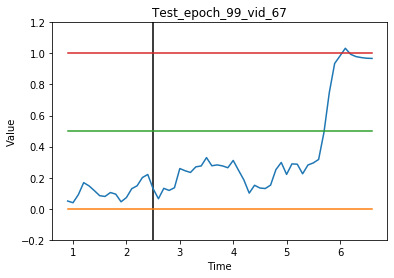

/mnt/linuxshared/data/BeamNG/positive/pos_334.mp4


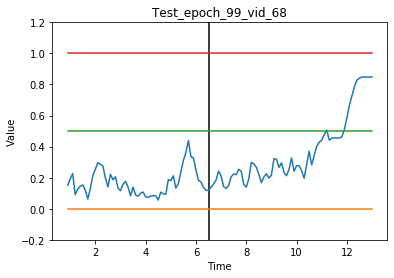

/mnt/linuxshared/data/BeamNG/positive/pos_342.mp4


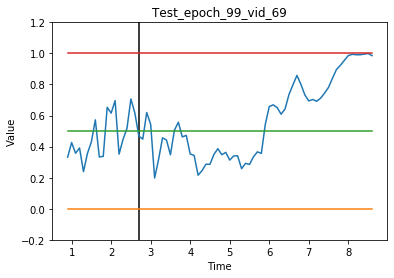

/mnt/linuxshared/data/BeamNG/positive/pos_348.mp4


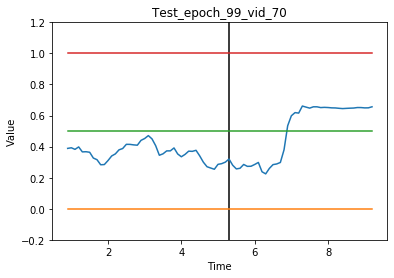

/mnt/linuxshared/data/BeamNG/positive/pos_351.mp4


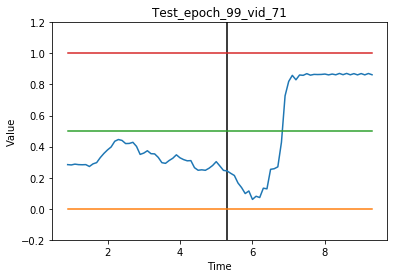

/mnt/linuxshared/data/BeamNG/positive/pos_354.mp4


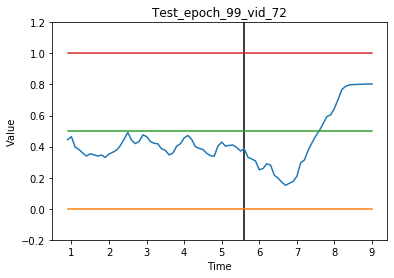

/mnt/linuxshared/data/BeamNG/positive/pos_355.mp4


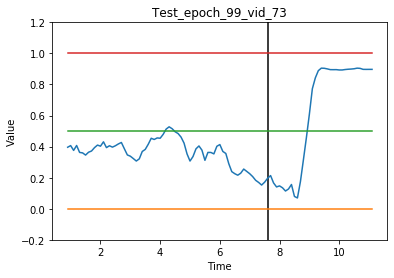

/mnt/linuxshared/data/BeamNG/positive/pos_356.mp4


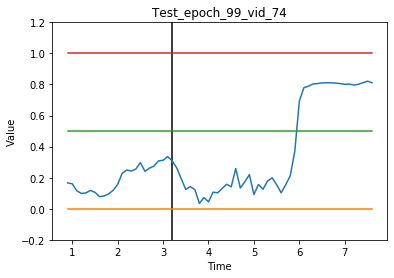

/mnt/linuxshared/data/BeamNG/positive/pos_357.mp4


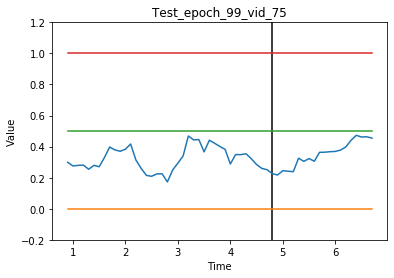

/mnt/linuxshared/data/BeamNG/positive/pos_373.mp4


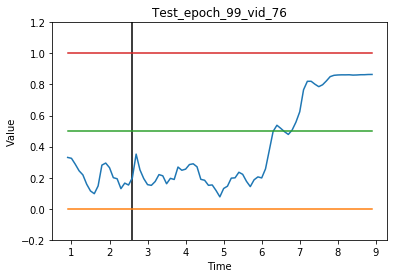

/mnt/linuxshared/data/BeamNG/positive/pos_381.mp4


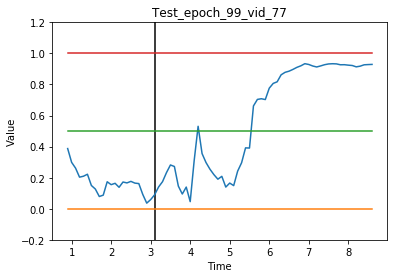

/mnt/linuxshared/data/BeamNG/positive/pos_382.mp4


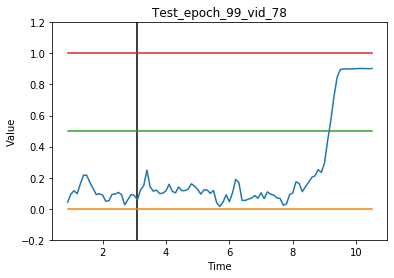

/mnt/linuxshared/data/BeamNG/positive/pos_384.mp4


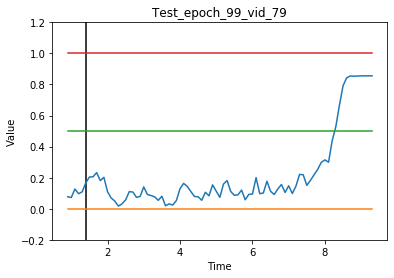

/mnt/linuxshared/data/BeamNG/positive/pos_385.mp4


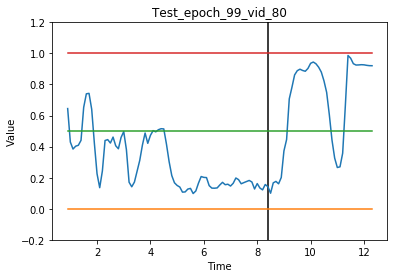

/mnt/linuxshared/data/BeamNG/positive/pos_398.mp4


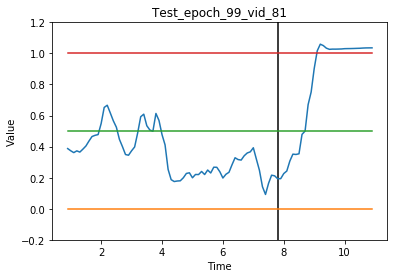

/mnt/linuxshared/data/BeamNG/positive/pos_401.mp4


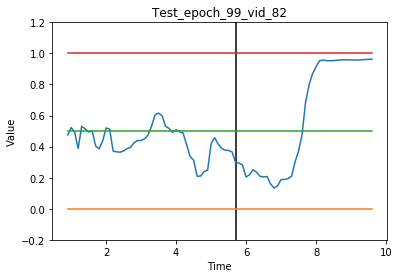

/mnt/linuxshared/data/BeamNG/positive/pos_407.mp4


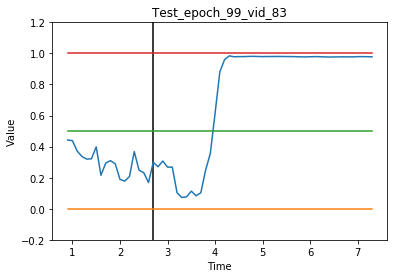

/mnt/linuxshared/data/BeamNG/positive/pos_411.mp4


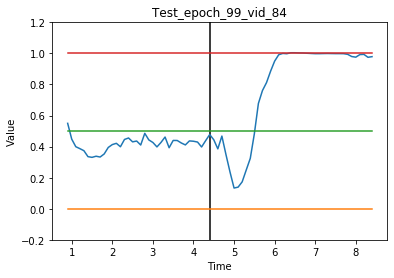

/mnt/linuxshared/data/BeamNG/positive/pos_422.mp4


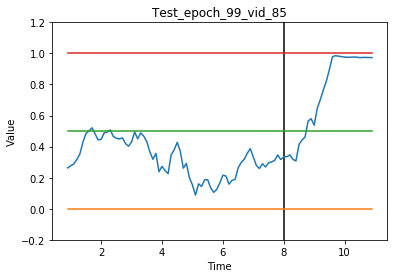

/mnt/linuxshared/data/BeamNG/positive/pos_423.mp4


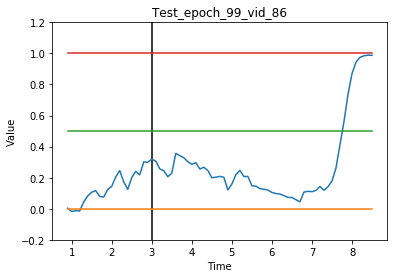

/mnt/linuxshared/data/BeamNG/positive/pos_426.mp4


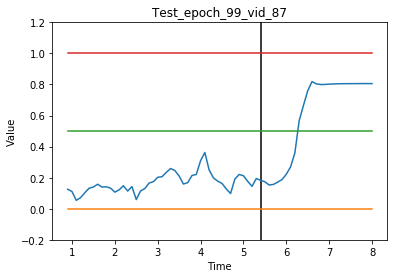

/mnt/linuxshared/data/BeamNG/positive/pos_427.mp4


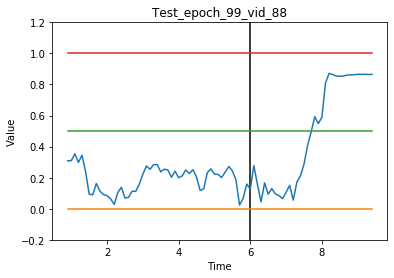

/mnt/linuxshared/data/BeamNG/positive/pos_432.mp4


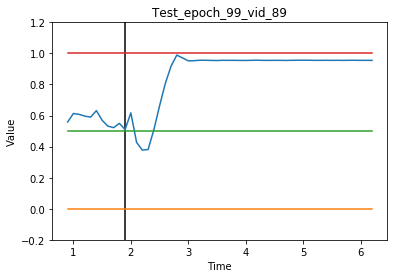

/mnt/linuxshared/data/BeamNG/positive/pos_446.mp4


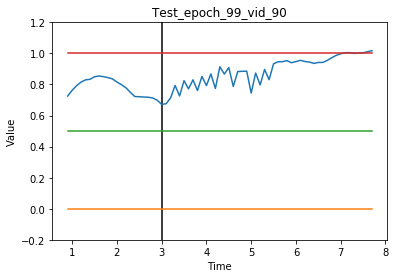

/mnt/linuxshared/data/BeamNG/positive/pos_454.mp4


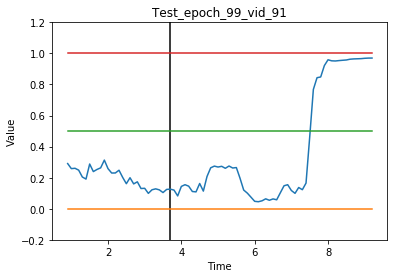

/mnt/linuxshared/data/BeamNG/positive/pos_465.mp4


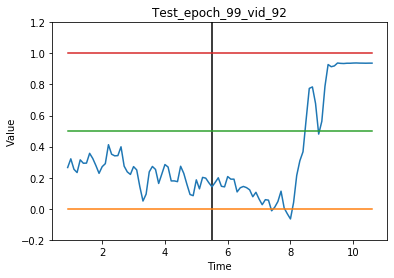

/mnt/linuxshared/data/BeamNG/positive/pos_466.mp4


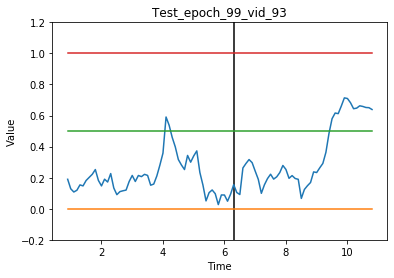

/mnt/linuxshared/data/BeamNG/positive/pos_467.mp4


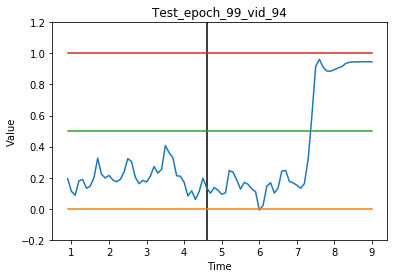

/mnt/linuxshared/data/BeamNG/positive/pos_478.mp4


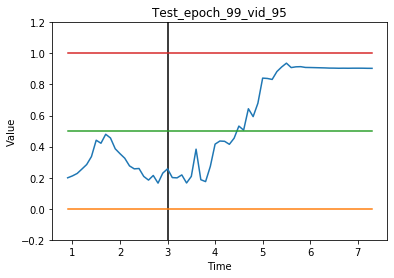

/mnt/linuxshared/data/BeamNG/positive/pos_486.mp4


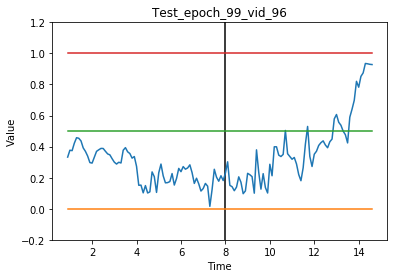

/mnt/linuxshared/data/BeamNG/positive/pos_491.mp4


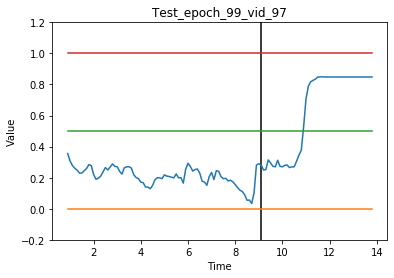

/mnt/linuxshared/data/BeamNG/positive/pos_497.mp4


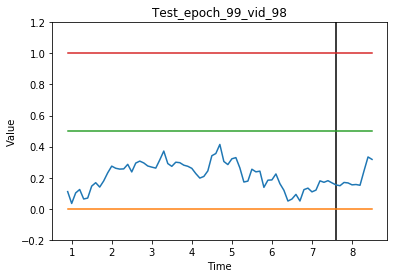

/mnt/linuxshared/data/BeamNG/positive/pos_500.mp4


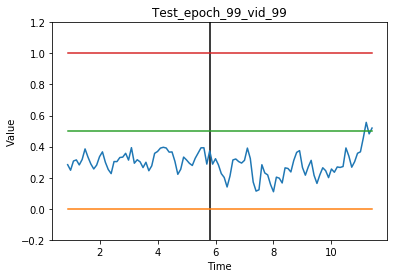

/mnt/linuxshared/data/BeamNG/negative/neg_1.mp4


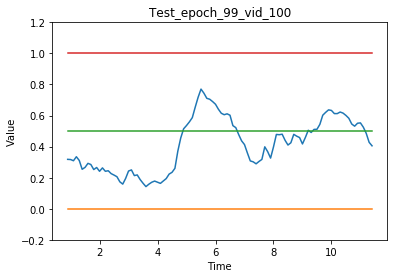

/mnt/linuxshared/data/BeamNG/negative/neg_9.mp4


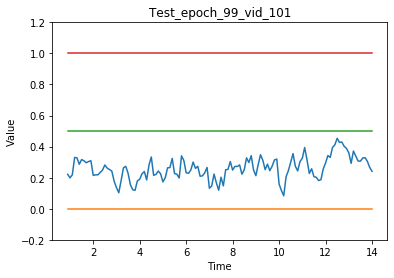

/mnt/linuxshared/data/BeamNG/negative/neg_11.mp4


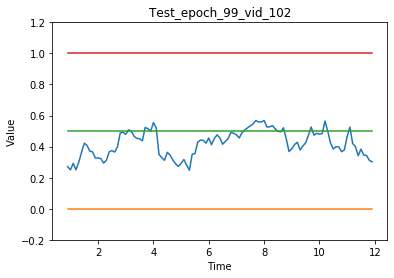

/mnt/linuxshared/data/BeamNG/negative/neg_23.mp4


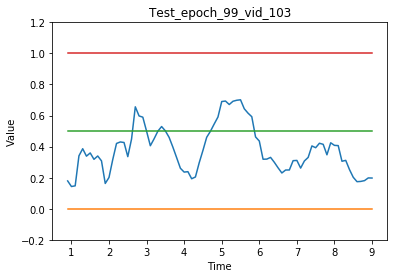

/mnt/linuxshared/data/BeamNG/negative/neg_27.mp4


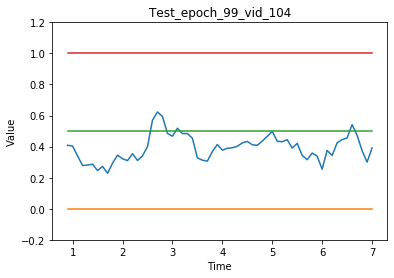

/mnt/linuxshared/data/BeamNG/negative/neg_30.mp4


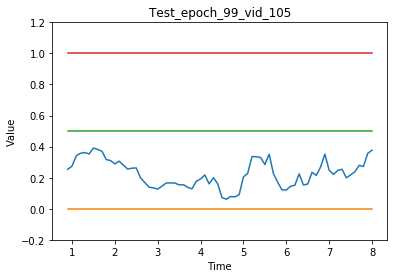

/mnt/linuxshared/data/BeamNG/negative/neg_45.mp4


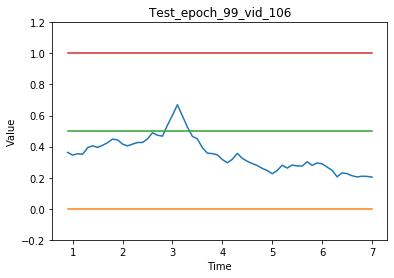

/mnt/linuxshared/data/BeamNG/negative/neg_54.mp4


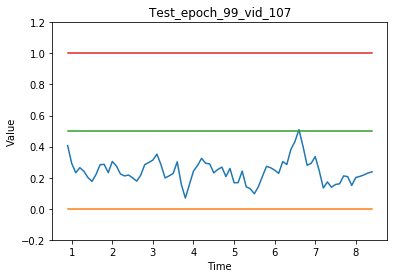

/mnt/linuxshared/data/BeamNG/negative/neg_59.mp4


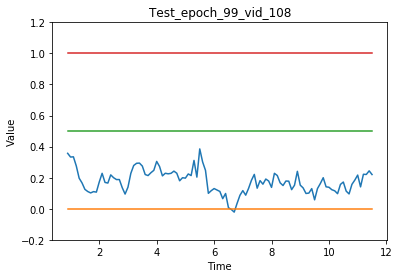

/mnt/linuxshared/data/BeamNG/negative/neg_63.mp4


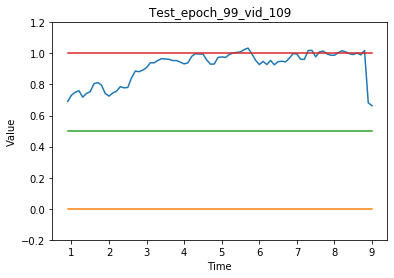

/mnt/linuxshared/data/BeamNG/negative/neg_67.mp4


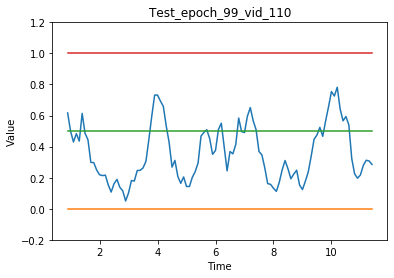

/mnt/linuxshared/data/BeamNG/negative/neg_71.mp4


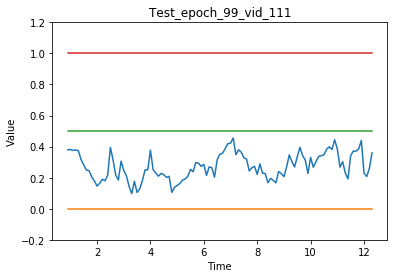

/mnt/linuxshared/data/BeamNG/negative/neg_77.mp4


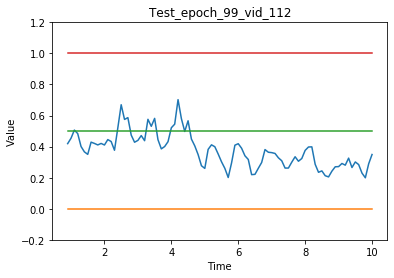

/mnt/linuxshared/data/BeamNG/negative/neg_79.mp4


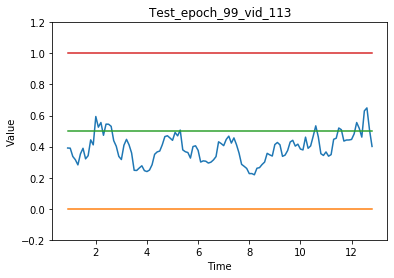

/mnt/linuxshared/data/BeamNG/negative/neg_81.mp4


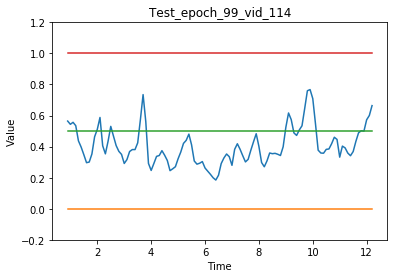

/mnt/linuxshared/data/BeamNG/negative/neg_82.mp4


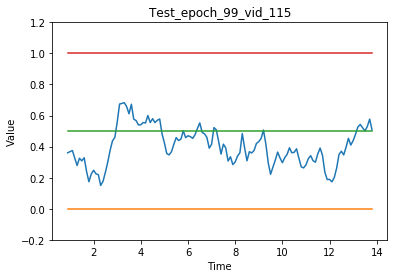

/mnt/linuxshared/data/BeamNG/negative/neg_86.mp4


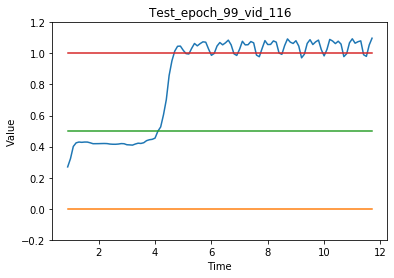

/mnt/linuxshared/data/BeamNG/negative/neg_92.mp4


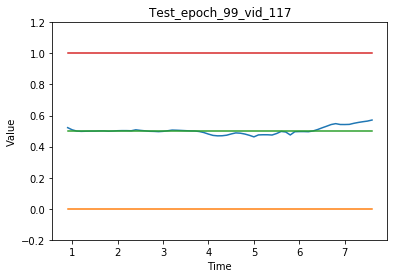

/mnt/linuxshared/data/BeamNG/negative/neg_95.mp4


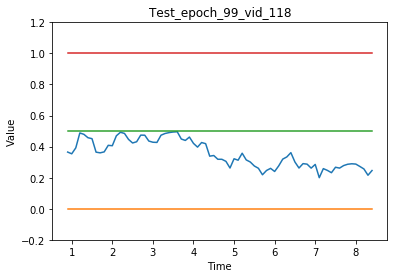

/mnt/linuxshared/data/BeamNG/negative/neg_100.mp4


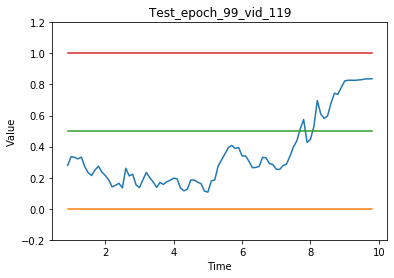

/mnt/linuxshared/data/BeamNG/negative/neg_107.mp4


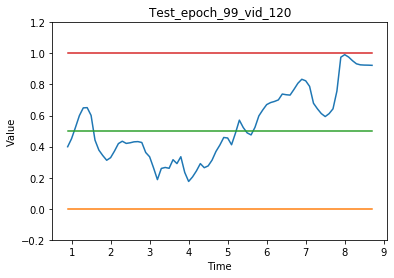

/mnt/linuxshared/data/BeamNG/negative/neg_113.mp4


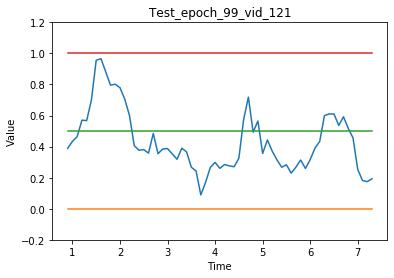

/mnt/linuxshared/data/BeamNG/negative/neg_118.mp4


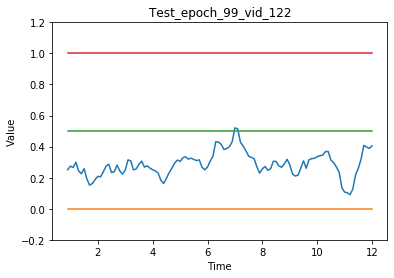

/mnt/linuxshared/data/BeamNG/negative/neg_119.mp4


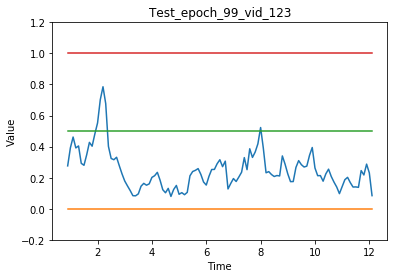

/mnt/linuxshared/data/BeamNG/negative/neg_122.mp4


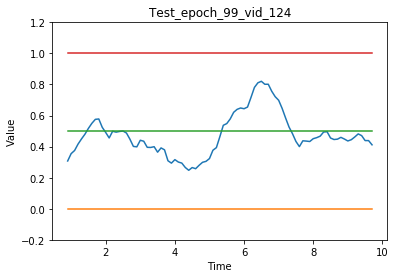

/mnt/linuxshared/data/BeamNG/negative/neg_129.mp4


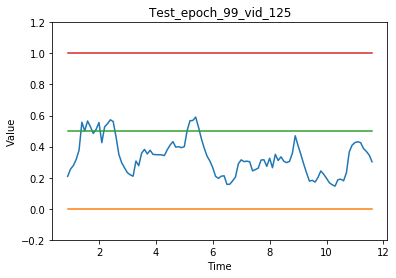

/mnt/linuxshared/data/BeamNG/negative/neg_130.mp4


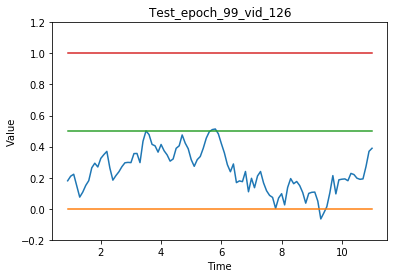

/mnt/linuxshared/data/BeamNG/negative/neg_141.mp4


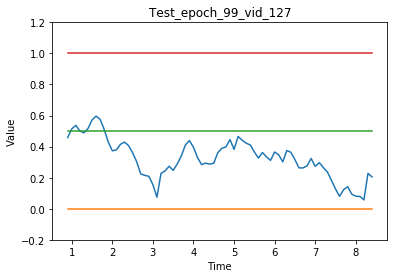

/mnt/linuxshared/data/BeamNG/negative/neg_147.mp4


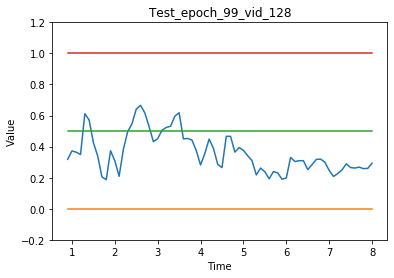

/mnt/linuxshared/data/BeamNG/negative/neg_166.mp4


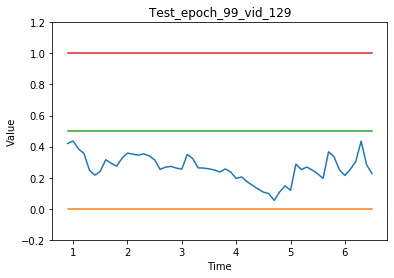

/mnt/linuxshared/data/BeamNG/negative/neg_167.mp4


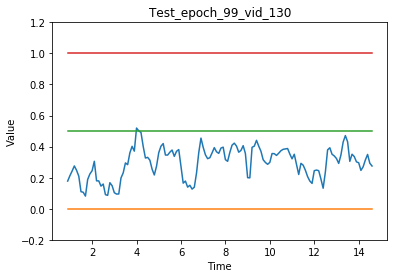

/mnt/linuxshared/data/BeamNG/negative/neg_170.mp4


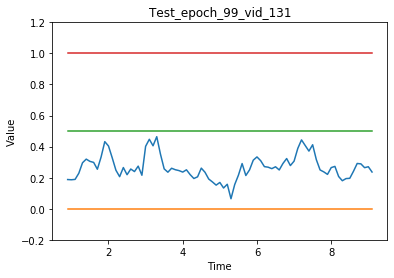

/mnt/linuxshared/data/BeamNG/negative/neg_172.mp4


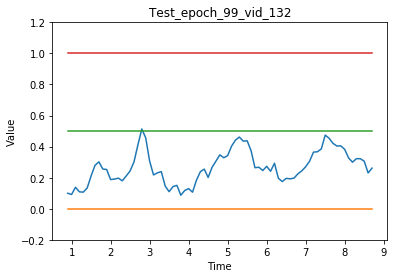

/mnt/linuxshared/data/BeamNG/negative/neg_182.mp4


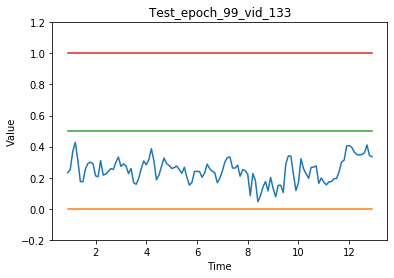

/mnt/linuxshared/data/BeamNG/negative/neg_200.mp4


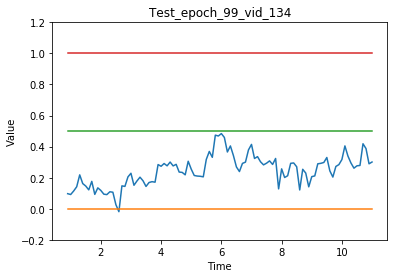

/mnt/linuxshared/data/BeamNG/negative/neg_202.mp4


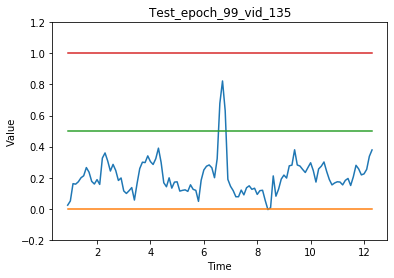

/mnt/linuxshared/data/BeamNG/negative/neg_208.mp4


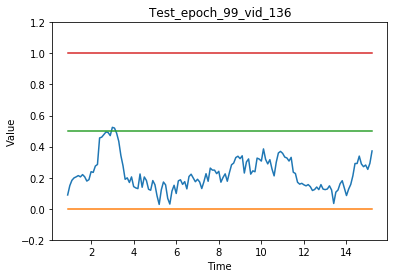

/mnt/linuxshared/data/BeamNG/negative/neg_210.mp4


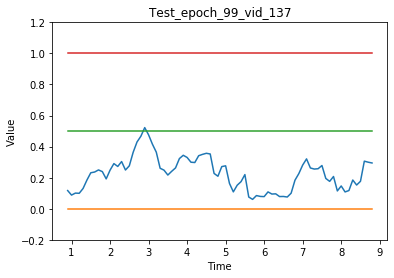

/mnt/linuxshared/data/BeamNG/negative/neg_230.mp4


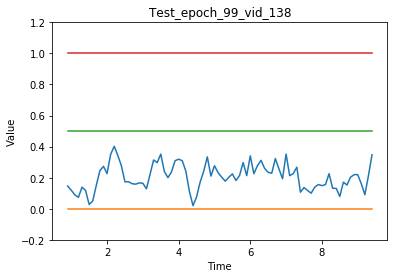

/mnt/linuxshared/data/BeamNG/negative/neg_236.mp4


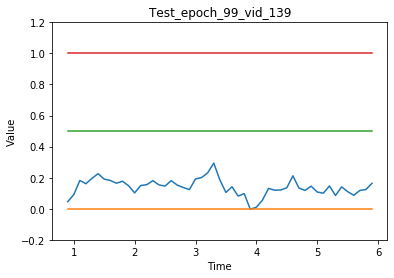

/mnt/linuxshared/data/BeamNG/negative/neg_244.mp4


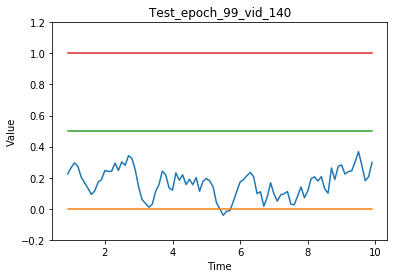

/mnt/linuxshared/data/BeamNG/negative/neg_245.mp4


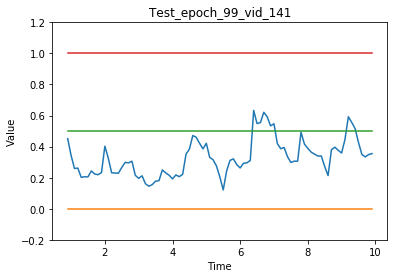

/mnt/linuxshared/data/BeamNG/negative/neg_248.mp4


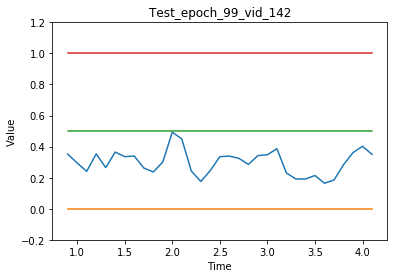

/mnt/linuxshared/data/BeamNG/negative/neg_250.mp4


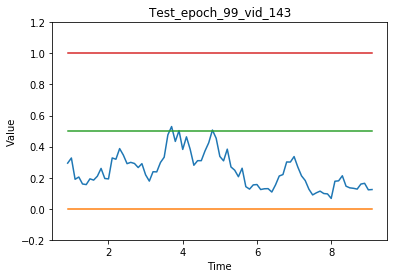

/mnt/linuxshared/data/BeamNG/negative/neg_257.mp4


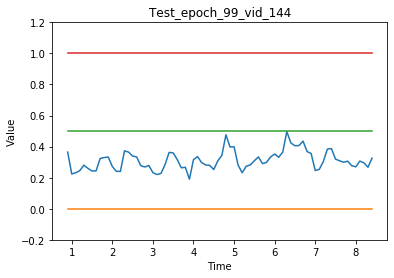

/mnt/linuxshared/data/BeamNG/negative/neg_258.mp4


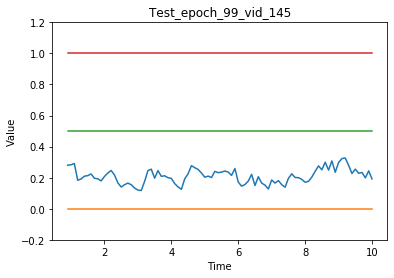

/mnt/linuxshared/data/BeamNG/negative/neg_259.mp4


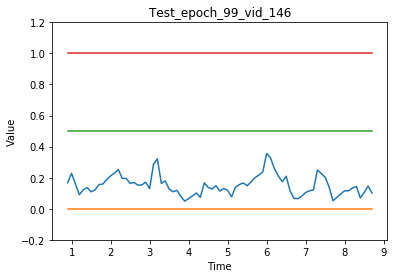

/mnt/linuxshared/data/BeamNG/negative/neg_262.mp4


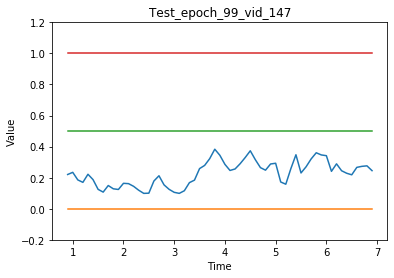

/mnt/linuxshared/data/BeamNG/negative/neg_264.mp4


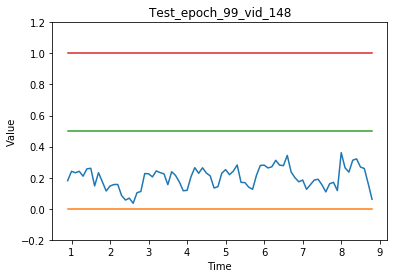

/mnt/linuxshared/data/BeamNG/negative/neg_275.mp4


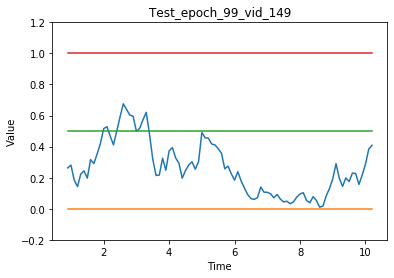

/mnt/linuxshared/data/BeamNG/negative/neg_280.mp4


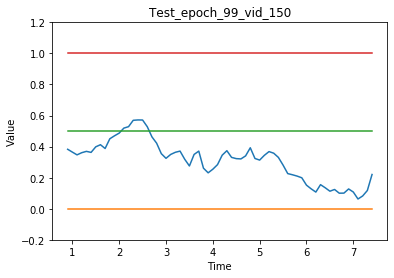

/mnt/linuxshared/data/BeamNG/negative/neg_286.mp4


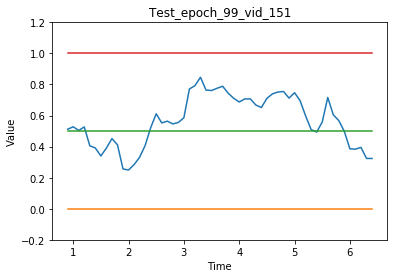

/mnt/linuxshared/data/BeamNG/negative/neg_303.mp4


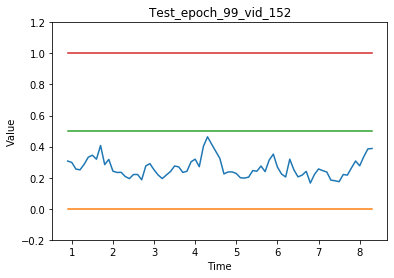

/mnt/linuxshared/data/BeamNG/negative/neg_313.mp4


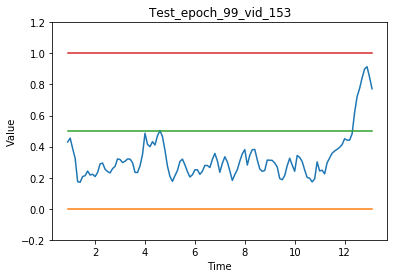

/mnt/linuxshared/data/BeamNG/negative/neg_315.mp4


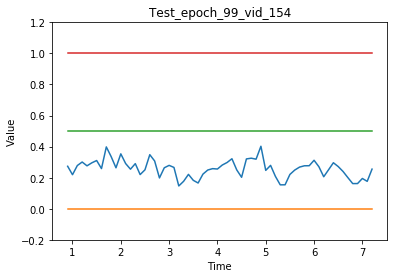

/mnt/linuxshared/data/BeamNG/negative/neg_317.mp4


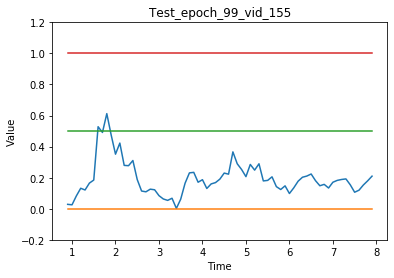

/mnt/linuxshared/data/BeamNG/negative/neg_330.mp4


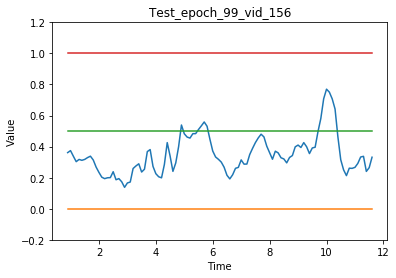

/mnt/linuxshared/data/BeamNG/negative/neg_332.mp4


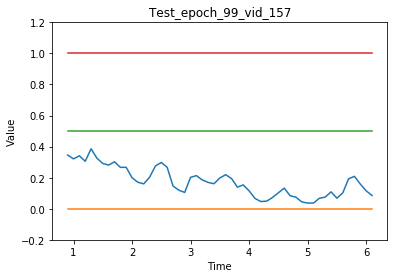

/mnt/linuxshared/data/BeamNG/negative/neg_335.mp4


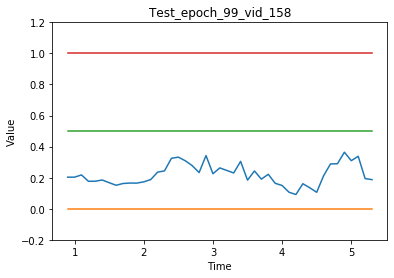

/mnt/linuxshared/data/BeamNG/negative/neg_343.mp4


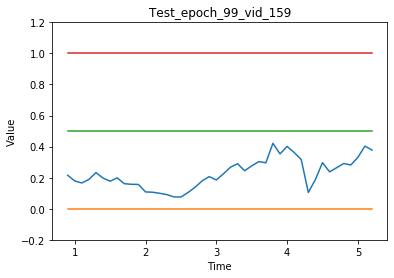

/mnt/linuxshared/data/BeamNG/negative/neg_344.mp4


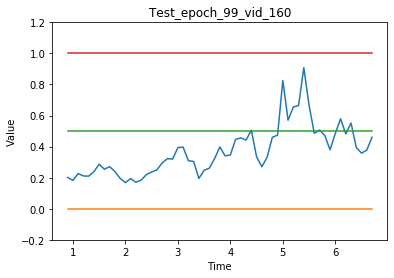

/mnt/linuxshared/data/BeamNG/negative/neg_347.mp4


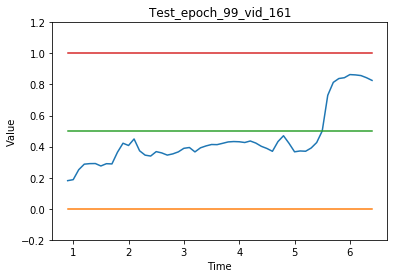

/mnt/linuxshared/data/BeamNG/negative/neg_351.mp4


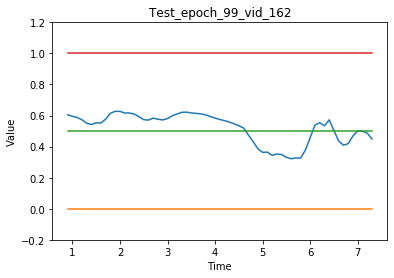

/mnt/linuxshared/data/BeamNG/negative/neg_355.mp4


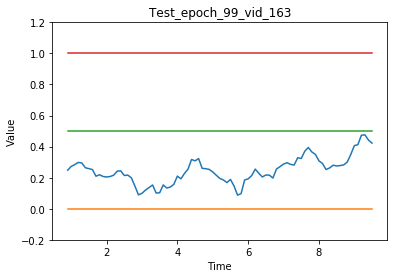

/mnt/linuxshared/data/BeamNG/negative/neg_357.mp4


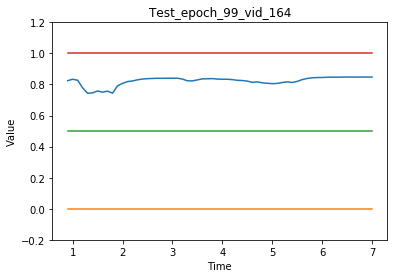

/mnt/linuxshared/data/BeamNG/negative/neg_360.mp4


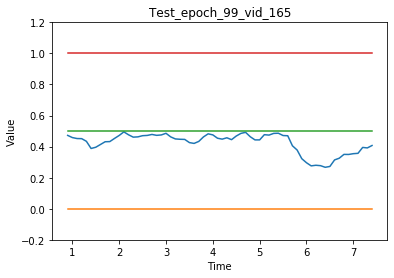

/mnt/linuxshared/data/BeamNG/negative/neg_361.mp4


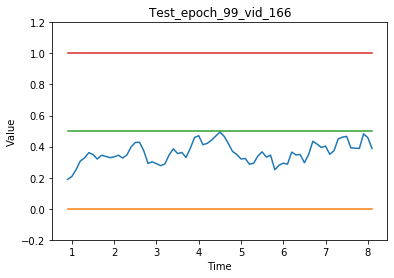

/mnt/linuxshared/data/BeamNG/negative/neg_370.mp4


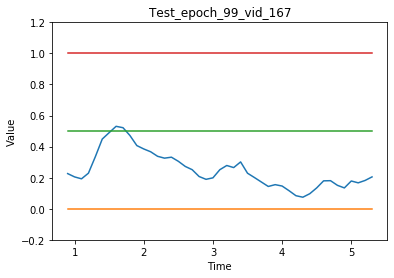

/mnt/linuxshared/data/BeamNG/negative/neg_376.mp4


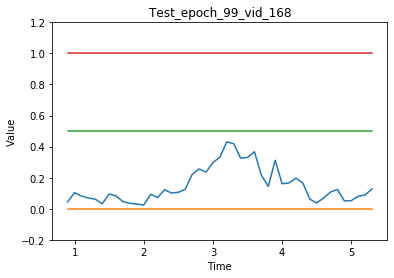

/mnt/linuxshared/data/BeamNG/negative/neg_382.mp4


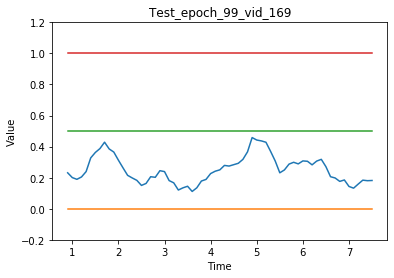

/mnt/linuxshared/data/BeamNG/negative/neg_386.mp4


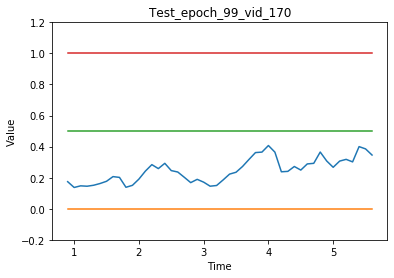

/mnt/linuxshared/data/BeamNG/negative/neg_393.mp4


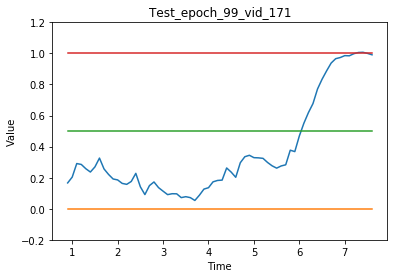

/mnt/linuxshared/data/BeamNG/negative/neg_400.mp4


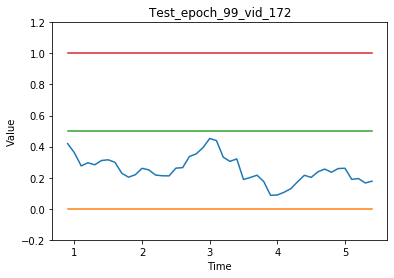

/mnt/linuxshared/data/BeamNG/negative/neg_402.mp4


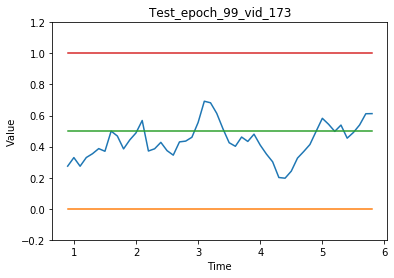

/mnt/linuxshared/data/BeamNG/negative/neg_408.mp4


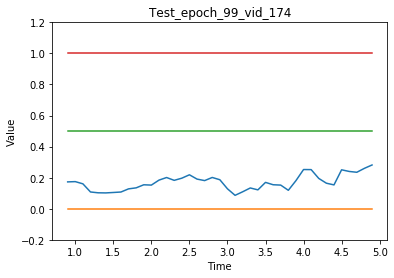

/mnt/linuxshared/data/BeamNG/negative/neg_412.mp4


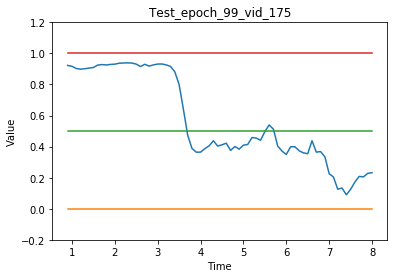

/mnt/linuxshared/data/BeamNG/negative/neg_423.mp4


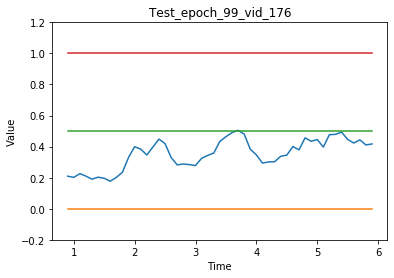

/mnt/linuxshared/data/BeamNG/negative/neg_428.mp4


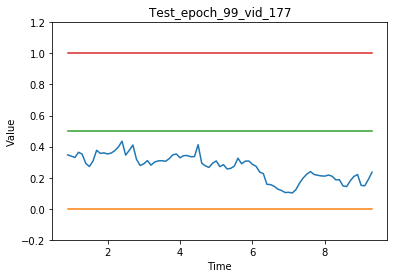

/mnt/linuxshared/data/BeamNG/negative/neg_431.mp4


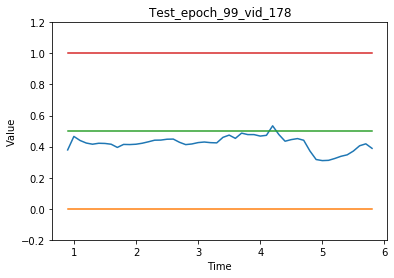

/mnt/linuxshared/data/BeamNG/negative/neg_440.mp4


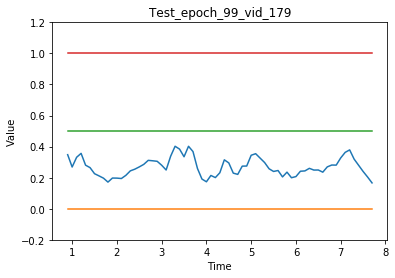

/mnt/linuxshared/data/BeamNG/negative/neg_441.mp4


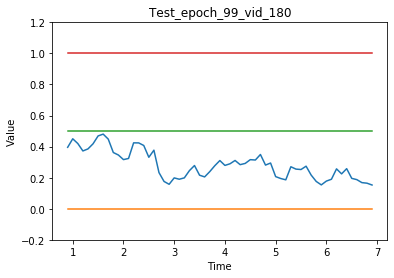

/mnt/linuxshared/data/BeamNG/negative/neg_443.mp4


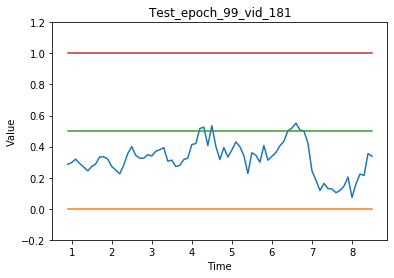

/mnt/linuxshared/data/BeamNG/negative/neg_445.mp4


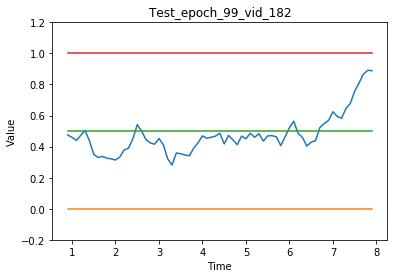

/mnt/linuxshared/data/BeamNG/negative/neg_448.mp4


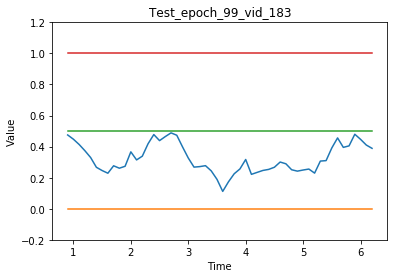

/mnt/linuxshared/data/BeamNG/negative/neg_456.mp4


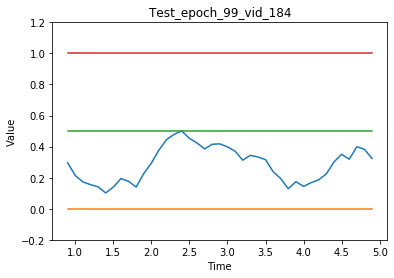

/mnt/linuxshared/data/BeamNG/negative/neg_457.mp4


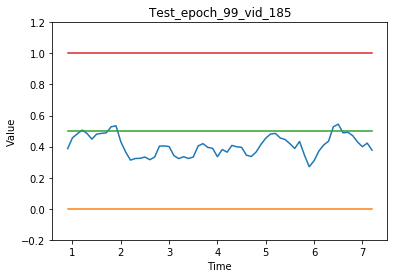

/mnt/linuxshared/data/BeamNG/negative/neg_459.mp4


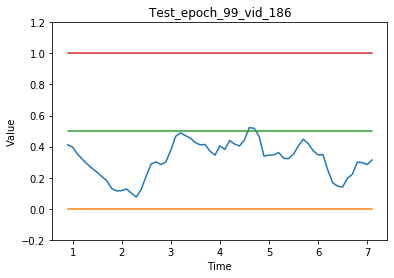

/mnt/linuxshared/data/BeamNG/negative/neg_465.mp4


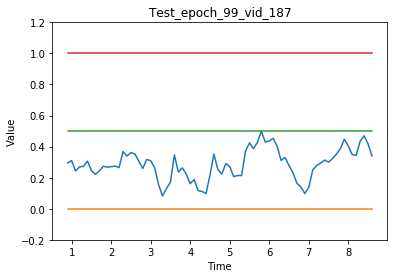

/mnt/linuxshared/data/BeamNG/negative/neg_466.mp4


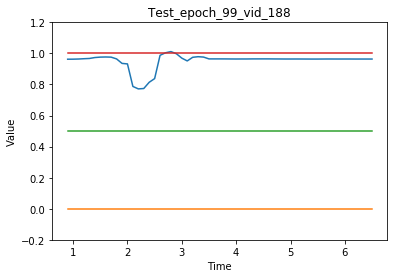

/mnt/linuxshared/data/BeamNG/negative/neg_467.mp4


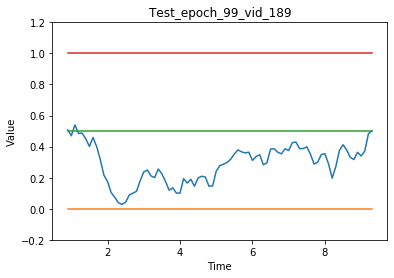

/mnt/linuxshared/data/BeamNG/negative/neg_468.mp4


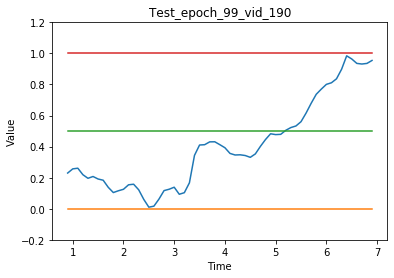

/mnt/linuxshared/data/BeamNG/negative/neg_470.mp4


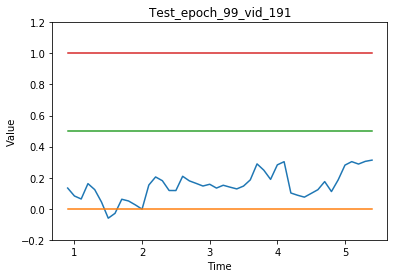

/mnt/linuxshared/data/BeamNG/negative/neg_471.mp4


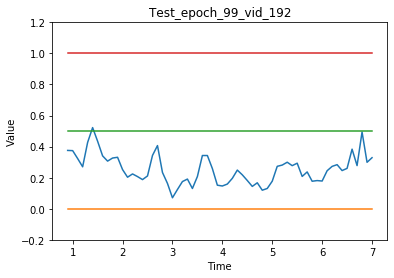

/mnt/linuxshared/data/BeamNG/negative/neg_472.mp4


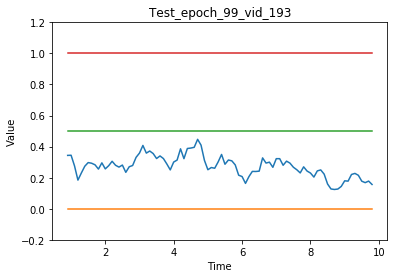

/mnt/linuxshared/data/BeamNG/negative/neg_477.mp4


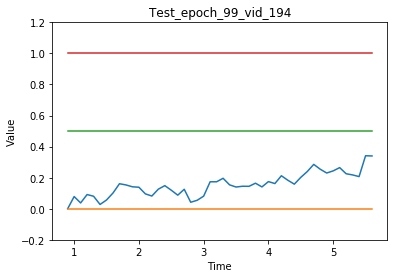

/mnt/linuxshared/data/BeamNG/negative/neg_480.mp4


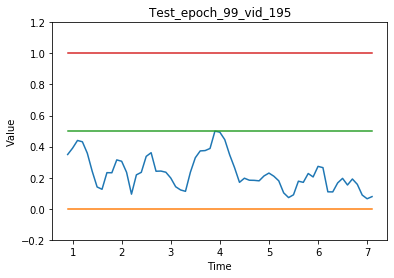

/mnt/linuxshared/data/BeamNG/negative/neg_481.mp4


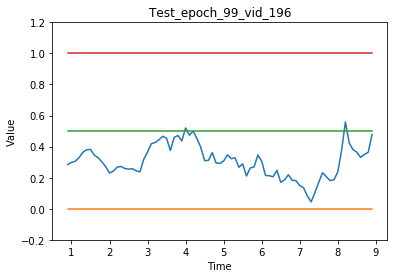

/mnt/linuxshared/data/BeamNG/negative/neg_484.mp4


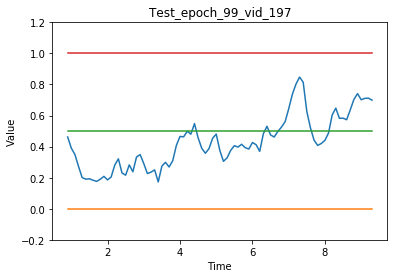

/mnt/linuxshared/data/BeamNG/negative/neg_489.mp4


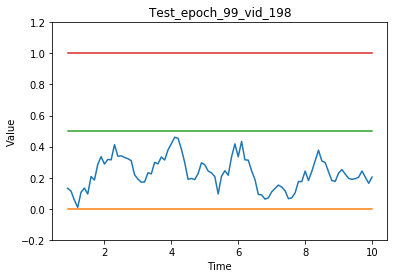

/mnt/linuxshared/data/BeamNG/negative/neg_499.mp4


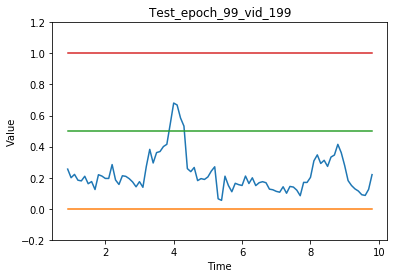

In [36]:
plot_several(test_preds_99, test_times_99, 'Test', 99, inc=1)

In [6]:
print(test_times_99[:21])

[ 9.8  1.1  8.9  3.4  1.4  2.9  9.   5.9  4.9  6.6  6.4  1.9  4.2  3.4
  7.4  4.6  2.4  3.9  4.3 11.1  7.4]


/mnt/linuxshared/data/BeamNG/positive/pos_1.mp4


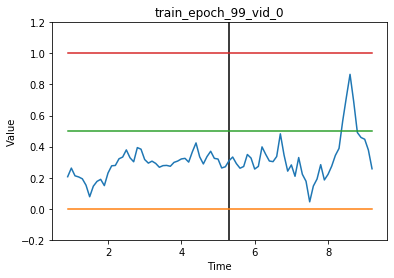

/mnt/linuxshared/data/BeamNG/positive/pos_61.mp4


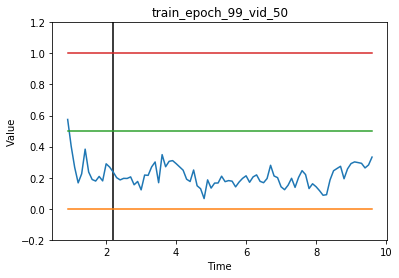

/mnt/linuxshared/data/BeamNG/positive/pos_118.mp4


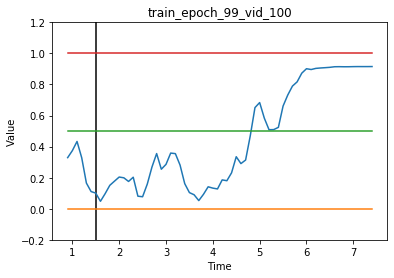

/mnt/linuxshared/data/BeamNG/positive/pos_183.mp4


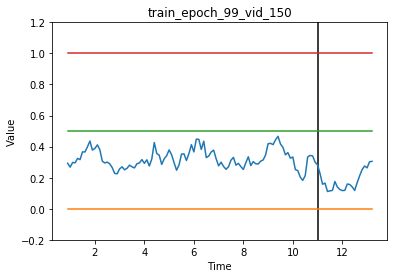

/mnt/linuxshared/data/BeamNG/positive/pos_250.mp4


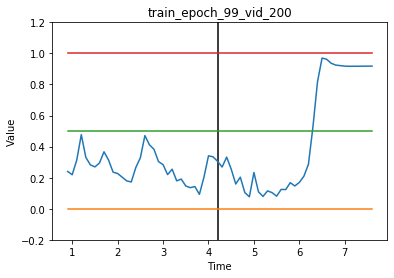

/mnt/linuxshared/data/BeamNG/positive/pos_316.mp4


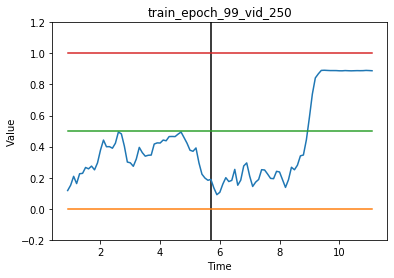

/mnt/linuxshared/data/BeamNG/positive/pos_378.mp4


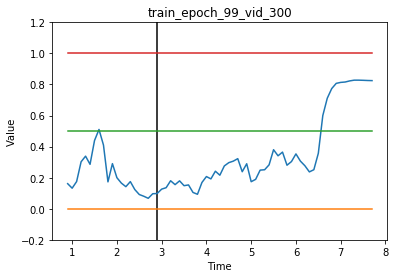

/mnt/linuxshared/data/BeamNG/positive/pos_441.mp4


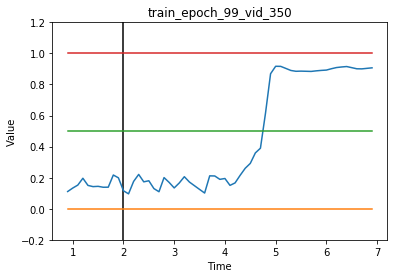

/mnt/linuxshared/data/BeamNG/negative/neg_2.mp4


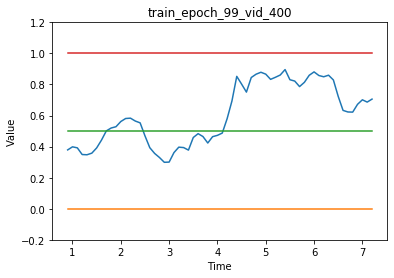

/mnt/linuxshared/data/BeamNG/negative/neg_60.mp4


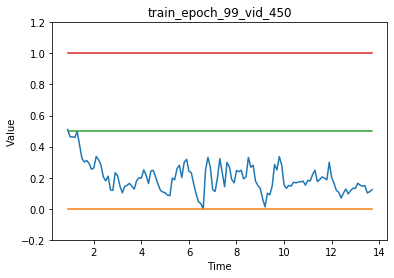

/mnt/linuxshared/data/BeamNG/negative/neg_126.mp4


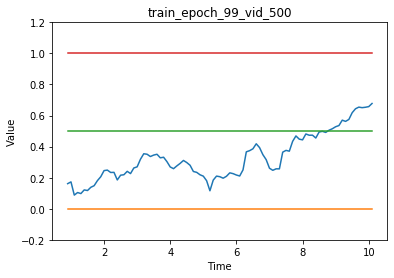

/mnt/linuxshared/data/BeamNG/negative/neg_185.mp4


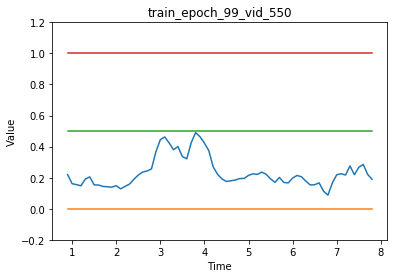

/mnt/linuxshared/data/BeamNG/negative/neg_241.mp4


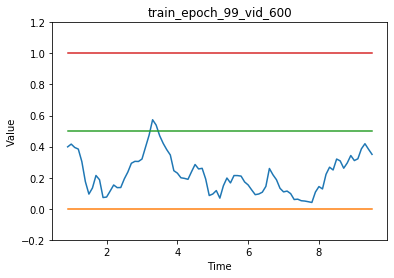

/mnt/linuxshared/data/BeamNG/negative/neg_304.mp4


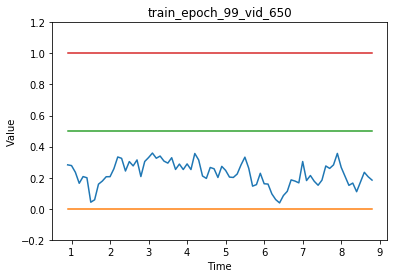

/mnt/linuxshared/data/BeamNG/negative/neg_368.mp4


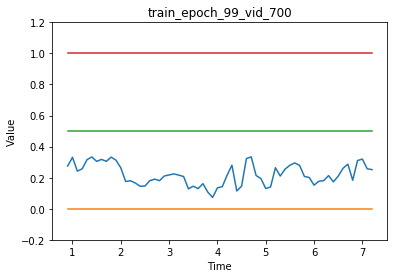

/mnt/linuxshared/data/BeamNG/negative/neg_429.mp4


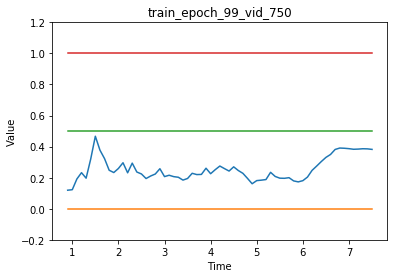

In [38]:
plot_several(train_preds_99, train_times_99, 'train', 99, inc=50, vid_locs=results_99['train_fullpaths'])

In [7]:
from extract_results import get_times, get_stats

train_predicted_times_99 = get_times(train_preds_99)
test_predicted_times_99 = get_times(test_preds_99)
print(test_predicted_times_99[:21])

get_stats(train_predicted_times_99, results_99['train_labels'], results_99['train_times'], "Train")
get_stats(test_predicted_times_99, results_99['test_labels'], results_99['test_times'], "Test")

[12.8  7.4  9.4  5.9  5.1  7.1  3.   8.1  7.1  7.4  2.3  3.7  1.3  2.8
  0.9  4.9  2.3  0.9  0.9 12.6  1.8]
Train Identification Accuracy
Percentage positive correctly identified 0.9775
Percentage negative correctly identified 0.43
Test time accuracy
Num positive correct: 391
[  3.1   3.1   2.9   1.6   1.9   3.    1.2  -0.7   6.2   0.9   2.    2.2
  -4.6  -3.1  -1.5   5.7  -3.7  -3.2   2.7  -4.4   1.4  -2.9   0.8   4.7
   0.9   2.   -7.6   1.6   4.8   2.2  -4.3  -2.8  -4.9   2.8   0.9  -6.
   3.8   7.2   3.1   0.8   1.4  -5.2   0.6  -6.4  -2.6  -1.2  -7.5  -4.2
  -1.3   3.3   1.   -3.6  -3.   -4.7  -4.1  -3.4  -3.2   1.5  -2.6  -2.2
  13.3  -3.6   6.6  -8.6   3.1  -1.7   1.6  -6.8  -2.4  -4.   -6.1  -0.6
   4.2  -9.6  -2.1  -5.8  -3.4  -4.8   2.9   1.6  -9.5   1.5  -0.5   2.9
  -8.1  -4.4  -2.7  -4.   -4.9  -5.5  -4.5  -4.3   1.9  -0.3   1.7  -7.
   0.7   0.4   3.4   4.5   5.2  -3.7  -5.5  -4.   -4.3  -1.6  -4.5  -4.
  -6.2  -5.   -6.3  -1.3  -3.    4.8   7.8   0.9  -6.5  -3.8  -7.1  -